In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['font.size'] = 18
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')
import matplotlib.font_manager as font_manager
font_dir = ['fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
plt.rcParams['font.family'] = 'hse sans'

In [2]:
data_path = '..\\data\\'

In [3]:
df = pd.read_csv(data_path + "dano_data_upsell.csv")
df

,Unnamed: 0,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,...,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg
0,0,39699,1428,2021-04-06,17.0,36.0,CL,73.0,34.0,F,...,0.169,47.0,1195,2021-04-06 15:41:00,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1
1,1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,...,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1
2,2,122414,34857,2021-06-05,500.0,60.0,CL,27.0,53.0,F,...,0.174,47.0,33799,2021-06-05 05:41:00,"1-CL, 2-CLР, 3-CC",CL,100.0,36.0,0.241,1
3,3,40378,94446,2021-09-08,100.0,36.0,CL,7.0,28.0,F,...,0.176,NaN,94123,2021-09-08 19:46:00,"1-CLР, 2-CLC",To CLC,70.0,36.0,0.105,0
4,4,161689,116692,2021-11-10,100.0,60.0,CL,10.0,41.0,M,...,0.171,8.0,116232,2021-11-10 11:10:00,"1-CLC, 2-CLР, 3-CC",To CLC,53.0,60.0,0.172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,225949,202717,92220,2021-09-02,100.0,36.0,CL,50.0,46.0,M,...,0.169,47.0,91738,2021-09-02 20:56:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225950,225950,169066,116340,2021-11-09,67.0,120.0,CL,10.0,35.0,M,...,0.169,2.0,115937,2021-11-09 14:32:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225951,225951,80373,125224,2021-12-02,167.0,36.0,CL,13.0,44.0,M,...,0.171,27.0,124981,2021-12-03 10:28:00,"1-CL, 2-CLР, 3-CC",CL,159.0,36.0,0.171,1
225952,225952,588,195337,2022-09-17,667.0,36.0,CL,27.0,45.0,F,...,0.207,NaN,194867,2022-09-17 16:33:00,"1-CL, 2-CLР",To CLR,NaN,NaN,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              225954 non-null  int64  
 1   customer_id             225954 non-null  int64  
 2   application_id          225954 non-null  int64  
 3   application_dttm        225954 non-null  object 
 4   req_amt                 225717 non-null  float64
 5   req_term                225767 non-null  float64
 6   req_product_code        225954 non-null  object 
 7   monthly_income_amt      215259 non-null  float64
 8   age                     225951 non-null  float64
 9   gender_code             225908 non-null  object 
 10  car_flg                 225954 non-null  int64  
 11  car_price               105312 non-null  float64
 12  realty_flg              225954 non-null  int64  
 13  realty_price            32671 non-null   float64
 14  cc_flg              

In [5]:
df['req_amt'].dtype == 'float64'

True

In [ ]:
print(*[(len(df[col].unique()), df[col].dtype) for col in df.columns], sep='\n')

(225954, dtype('int64'))
(199356, dtype('int64'))
(211004, dtype('int64'))
(635, dtype('O'))
(858, dtype('float64'))
(79, dtype('float64'))
(3, dtype('O'))
(363, dtype('float64'))
(60, dtype('float64'))
(3, dtype('O'))
(2, dtype('int64'))
(1884, dtype('float64'))
(2, dtype('int64'))
(5203, dtype('float64'))
(2, dtype('int64'))
(551, dtype('float64'))
(72, dtype('float64'))
(566, dtype('float64'))
(37, dtype('float64'))
(2919, dtype('float64'))
(66, dtype('float64'))
(135, dtype('float64'))
(225954, dtype('int64'))
(173970, dtype('O'))
(22, dtype('O'))
(7, dtype('O'))
(688, dtype('float64'))
(92, dtype('float64'))
(183, dtype('float64'))
(2, dtype('int64'))


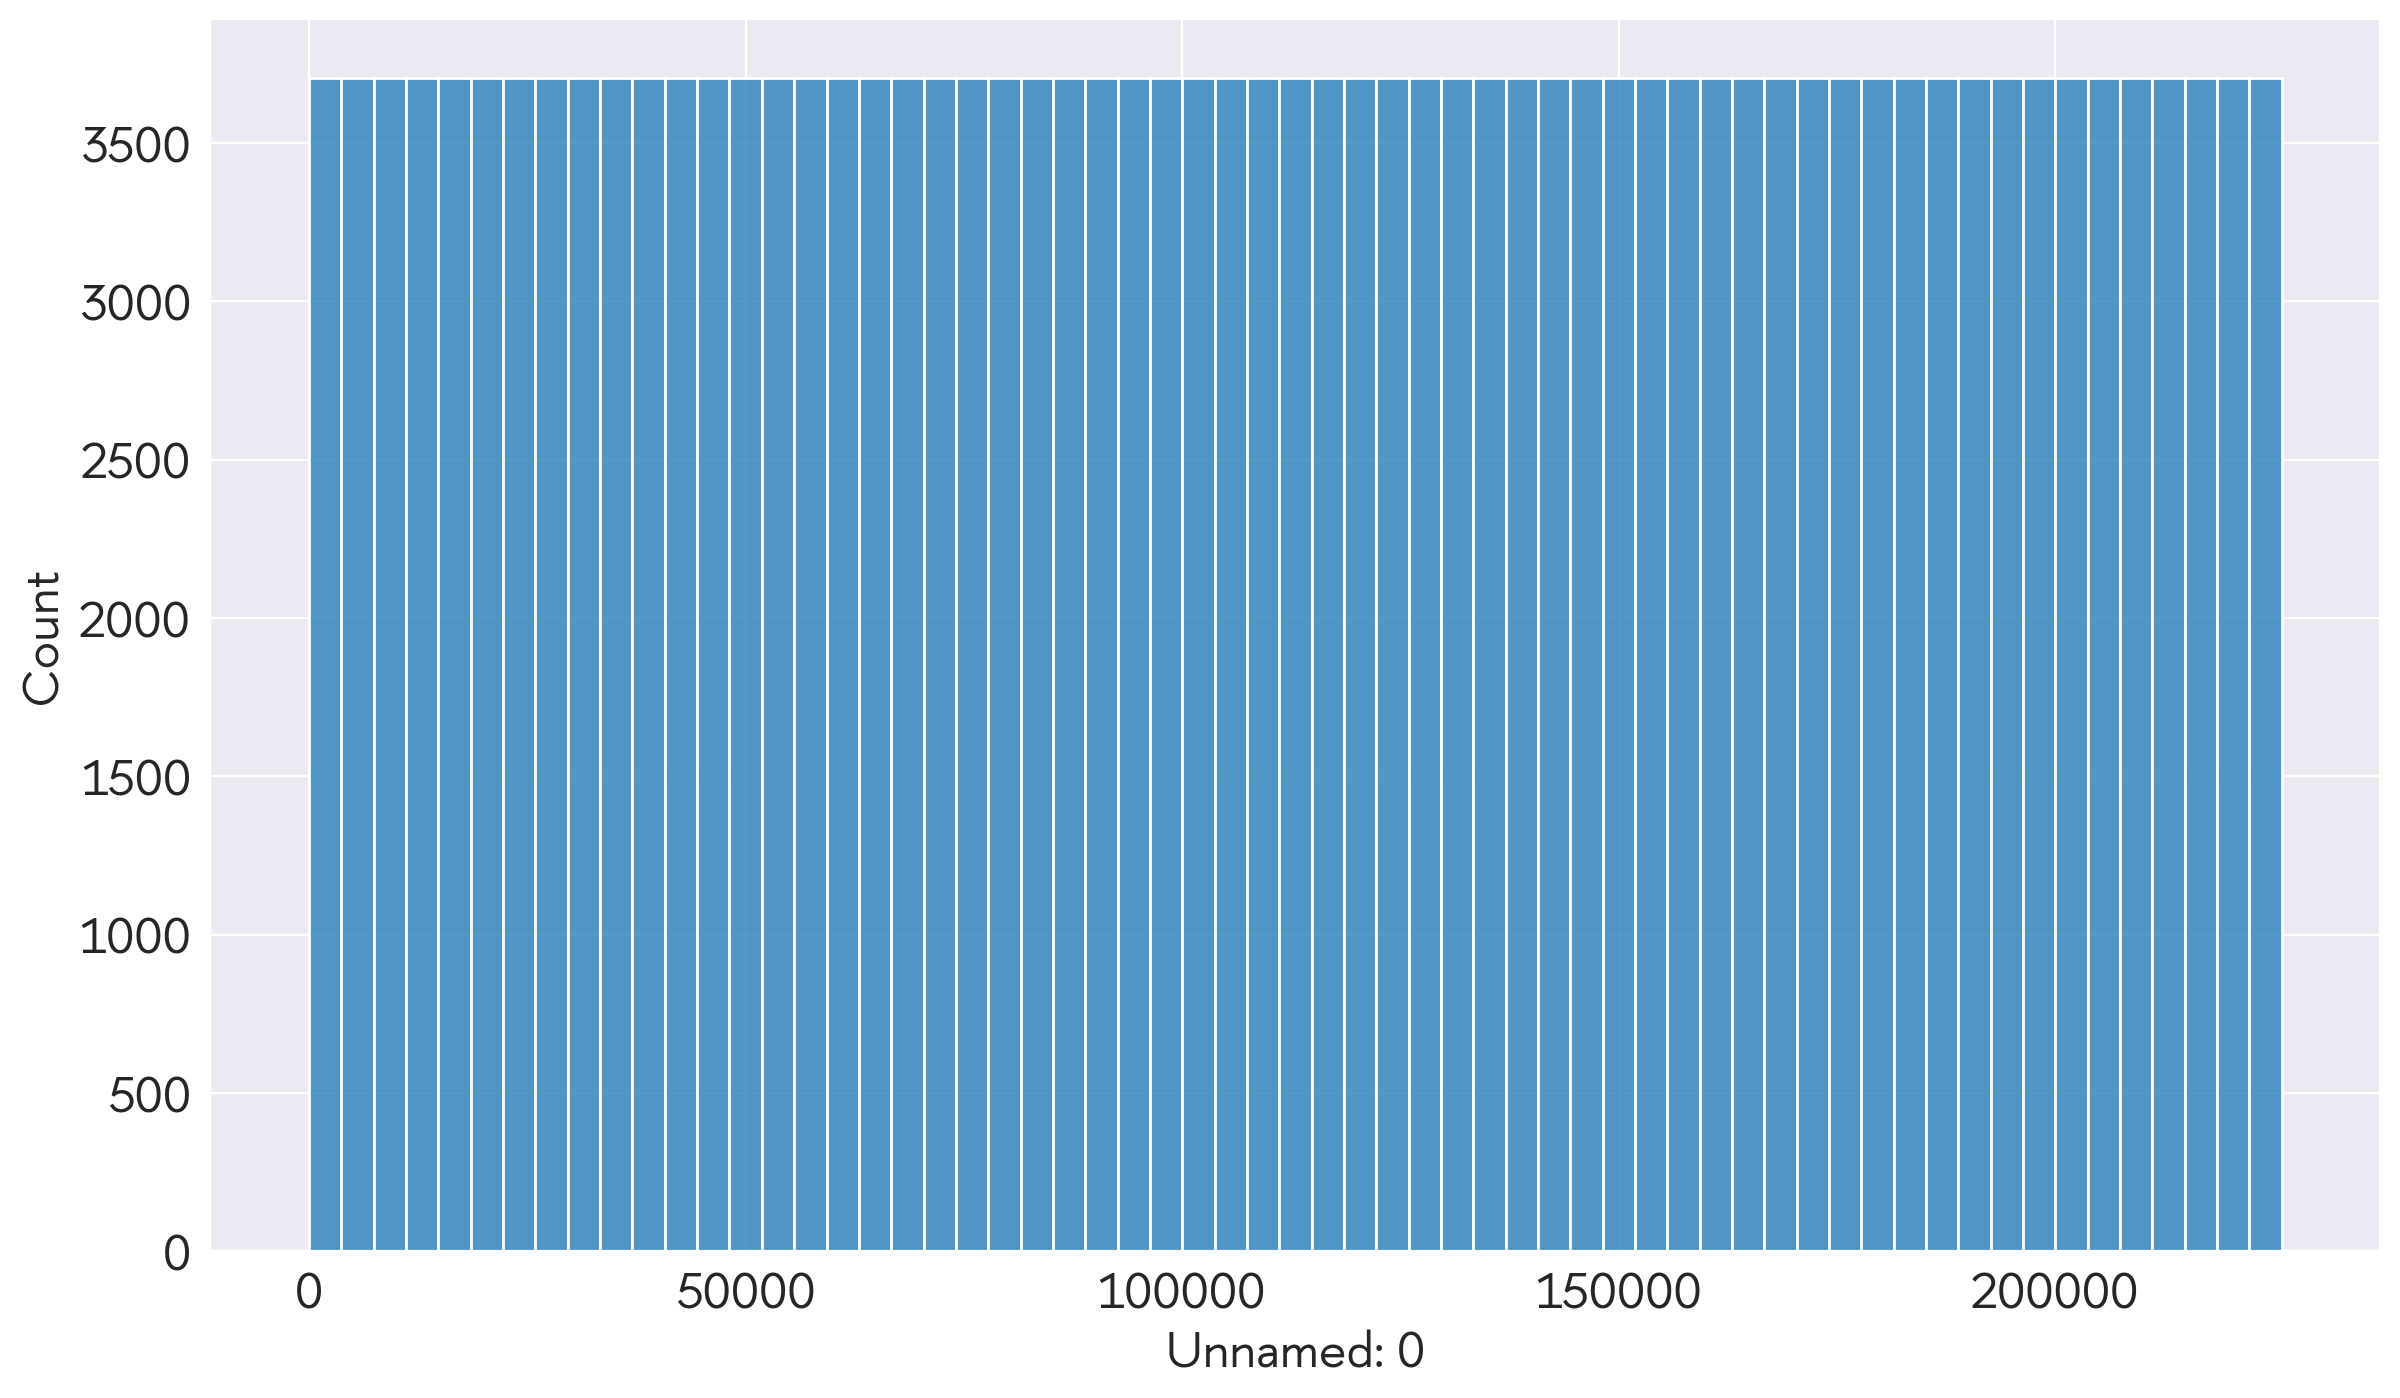

In [6]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()
    break

In [8]:
df.head(2)

,Unnamed: 0,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,...,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg
0,0,39699,1428,2021-04-06,17.0,36.0,CL,73.0,34.0,F,...,0.169,47.0,1195,2021-04-06 15:41:00,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1
1,1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,...,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1


In [12]:
from spandas.preprocessing import data_preprocessing, Loggs

In [40]:
exc = ['success_activate_flg', 'Unnamed: 0', 'customer_id',
       'application_id', 'car_flg', "realty_flg", 'cc_flg',
       'agreement_id', 'success_activate_flg', 'req_term',
       'account_term']

In [41]:
clear_df, deleted = data_preprocessing(df, logging=Loggs(was_became=False), exclude=exc)

 ____         _              _              _                _         
/ ___|   ___ | |  ___   ___ | |_   ___   __| |   ___   ___  | | ___  _ 
\___ \  / _ \| | / _ \ / __|| __| / _ \ / _` |  / __| / _ \ | |/ __|(_)
 ___) ||  __/| ||  __/| (__ | |_ |  __/| (_| | | (__ | (_) || |\__ \ _ 
|____/  \___||_| \___| \___| \__| \___| \__,_|  \___| \___/ |_||___/(_)
                                                                       


req_amt | monthly_income_amt | age | car_price | realty_price | cl_approve_amt | cl_rate | clc_approve_amt | clc_rate | clr_approve_amt | clr_rate | cc_approve_amt | account_amt | account_rate
                                                                      
                                                                      
                                                                      
                                                                      
 _____  _____  _____  _____  _____  _____  _____  _____  _____  _____ 
|_____||_____||___

In [42]:
clear_df

,Unnamed: 0,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,...,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg
0,0,39699,1428,2021-04-06,17.0,36.0,CL,73.0,34.0,F,...,0.169,47.0,1195,2021-04-06 15:41:00,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1
1,1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,...,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1
3,3,40378,94446,2021-09-08,100.0,36.0,CL,7.0,28.0,F,...,0.176,NaN,94123,2021-09-08 19:46:00,"1-CLР, 2-CLC",To CLC,70.0,36.0,0.105,0
4,4,161689,116692,2021-11-10,100.0,60.0,CL,10.0,41.0,M,...,0.171,8.0,116232,2021-11-10 11:10:00,"1-CLC, 2-CLР, 3-CC",To CLC,53.0,60.0,0.172,0
6,6,50471,147808,2022-02-08,117.0,36.0,CL,23.0,42.0,M,...,0.153,NaN,147589,2022-02-08 10:52:00,"1-CL, 2-CLР",CL,133.0,60.0,0.175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225946,225946,95444,154340,2022-02-25,163.0,36.0,CL,50.0,25.0,M,...,0.175,47.0,154170,2022-02-25 20:41:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225948,225948,139995,49724,2021-06-23,67.0,36.0,CL,33.0,32.0,F,...,0.148,14.0,49384,2021-06-24 11:15:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225949,225949,202717,92220,2021-09-02,100.0,36.0,CL,50.0,46.0,M,...,0.169,47.0,91738,2021-09-02 20:56:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225950,225950,169066,116340,2021-11-09,67.0,120.0,CL,10.0,35.0,M,...,0.169,2.0,115937,2021-11-09 14:32:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0


In [43]:
clear_df.to_csv(data_path + "clear_df.csv")